In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import os
import tensorflow
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img, img_to_array
from tqdm import tqdm
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
folder_path = r"C:\Users\KIIT0001\Desktop\Emotion_detection_using_CNN\Data"
train_data_dir = r"C:\Users\KIIT0001\Desktop\Emotion_detection_using_CNN\Data\train"
test_data_dir = r"C:\Users\KIIT0001\Desktop\Emotion_detection_using_CNN\Data\test"

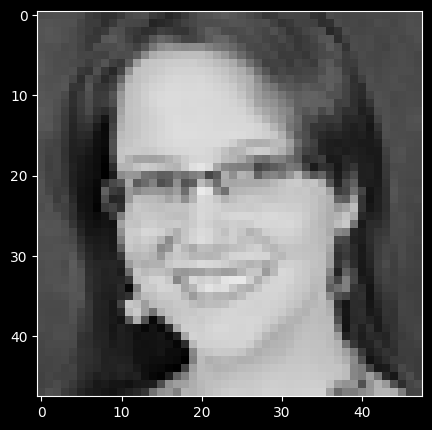

In [3]:
plt.style.use('dark_background')
expression = 'happy'
plt.figure(figsize= (5,5))
imageIndex = 0
imagePath = os.path.join(folder_path+"\\train\\"+expression+"\\"+ os.listdir(folder_path + "\\train\\" + expression)[imageIndex])
img = load_img(imagePath, target_size=(48, 48))
plt.imshow(img)   
plt.show()

In [4]:
def createDF(dir):
    imagePaths = []
    labels = []
    for label in os.listdir(dir):
        label_dir = os.path.join(dir, label)
        if os.path.isdir(label_dir):
            imagePaths.extend([os.path.join(label_dir, imagename) for imagename in os.listdir(label_dir)])
            labels.extend([label] * len(os.listdir(label_dir)))
            print(label, 'DONE')
    return imagePaths, labels
train = pd.DataFrame()
train['IMAGE'], train['LABEL'] = createDF(train_data_dir)
print("Train Data:\n", train)
test = pd.DataFrame()
test['IMAGE'], test['LABEL'] = createDF(test_data_dir)
print("Test Data:\n", test)

angry DONE
disgusted DONE
fearful DONE
happy DONE
neutral DONE
sad DONE
surprised DONE
Train Data:
                                                    IMAGE      LABEL
0      C:\Users\KIIT0001\Desktop\Emotion_detection_us...      angry
1      C:\Users\KIIT0001\Desktop\Emotion_detection_us...      angry
2      C:\Users\KIIT0001\Desktop\Emotion_detection_us...      angry
3      C:\Users\KIIT0001\Desktop\Emotion_detection_us...      angry
4      C:\Users\KIIT0001\Desktop\Emotion_detection_us...      angry
...                                                  ...        ...
28704  C:\Users\KIIT0001\Desktop\Emotion_detection_us...  surprised
28705  C:\Users\KIIT0001\Desktop\Emotion_detection_us...  surprised
28706  C:\Users\KIIT0001\Desktop\Emotion_detection_us...  surprised
28707  C:\Users\KIIT0001\Desktop\Emotion_detection_us...  surprised
28708  C:\Users\KIIT0001\Desktop\Emotion_detection_us...  surprised

[28709 rows x 2 columns]
angry DONE
disgusted DONE
fearful DONE
happy DONE
neutral 

In [5]:
def extract_features(images):
    return np.array([np.array(load_img(image, color_mode="grayscale")) for image in tqdm(images)]).reshape(-1, 48, 48, 1)
train_features = extract_features(train['IMAGE'])
test_features = extract_features(test['IMAGE'])
X_train = train_features / 255.0
X_test = test_features / 255.0

  0%|          | 0/28709 [00:00<?, ?it/s]

100%|██████████| 7178/7178 [01:13<00:00, 97.65it/s] 


In [6]:
LE = LabelEncoder()
LE.fit(train['LABEL'])
Y_train = LE.transform(train['LABEL'])
Y_test = LE.transform(test['LABEL'])
no_of_classes = 7
Y_train = to_categorical(Y_train,no_of_classes)
Y_test = to_categorical(Y_test,no_of_classes)

In [7]:
model = Sequential()
# 1st layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# 2nd layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# 3rd layer
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# 4th layer
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))    
# Flattening and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))    
# Output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\KIIT0001\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,420,423 (13.05 MB)

 Trainable params: 3,420,423 (13.05 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 100
batch_size = 128
checkPoint = ModelCheckpoint("./model_best1.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlyStopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
callbacksList = [checkPoint, earlyStopping]
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.save('model1.keras')

In [11]:
history = model.fit(x=X_train,y=Y_train,epochs=epochs,validation_data=(X_test,Y_test),callbacks=callbacksList)
random.seed(42)
model.save('final_model1.keras')

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.2436 - loss: 1.8278
Epoch 1: val_loss improved from inf to 1.80769, saving model to ./model_best1.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 176s 194ms/step - accuracy: 0.2436 - loss: 1.8278 - val_accuracy: 0.2565 - val_loss: 1.8077
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2677 - loss: 1.7738
Epoch 2: val_loss improved from 1.80769 to 1.59400, saving model to ./model_best1.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.2678 - loss: 1.7738 - val_accuracy: 0.3782 - val_loss: 1.5940
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3540 - loss: 1.6273
Epoch 3: val_loss improved from 1.59400 to 1.47169, saving model to ./model_best1.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 128s 143ms/step - accuracy: 0.3540 - loss: 1.6273 - val_accuracy: 0.4366 - val_loss: 1.4717
Epoch 4/100
897/898 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4132 - loss: 1.5121
Epoch 4: val_loss imp

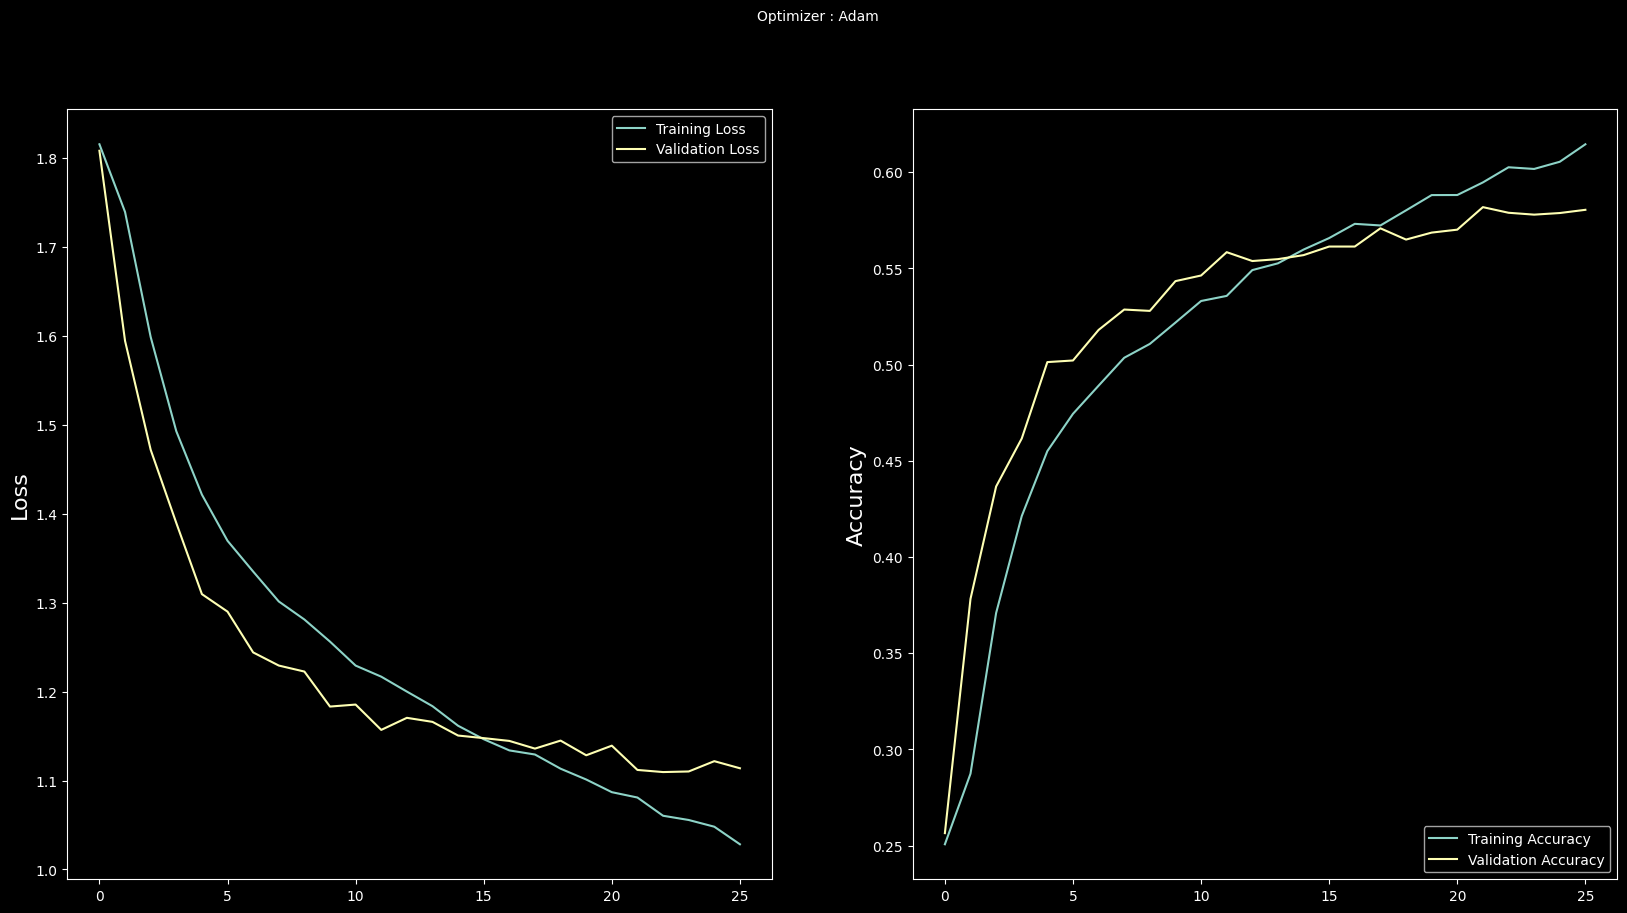

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()